In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# --------  Load the Trained Model --------
model = joblib.load("best_rf_model.joblib")
print("✅ Model Loaded")


✅ Model Loaded


In [ ]:
# --------  Smart Alert Function --------
def smart_alert(temp_c, wind_speed):
    """
    Inputs: temp_c (°C), wind_speed (m/s)
    Output: Smart Alert message + probabilities
    """
    import pandas as pd
    import numpy as np
    
    # Same feature names as training
    features = pd.DataFrame(
        [[temp_c, wind_speed]],
        columns=["temperature_C", "wind_speed_ms"]
    )
    
    # Predict probabilities
    prob = model.predict_proba(features)[0]
    classes = model.classes_
    
    pred_class = classes[np.argmax(prob)]
    pred_prob = np.max(prob)
    
    if pred_prob > 0.7:
        msg = f"⚠️ {pred_prob*100:.1f}% chance of {pred_class}"
    else:
        msg = f"✅ Safe: No strong rain signal"
    
    return msg, prob, classes


# --------  Event Planner Function --------
def event_planner(date, lat, lon, temp_c, wind_speed):
    """
    Inputs:
        date: event date/time (string or datetime)
        lat, lon: location
        temp_c: temperature in Celsius
        wind_speed: wind speed in m/s
    Output:
        Event recommendation message
    """
    msg, prob, classes = smart_alert(temp_c, wind_speed)
    
    if "chance" in msg:
        recommendation = f"⚠️ High risk of rain at {date} in location ({lat}, {lon}). Consider a backup plan."
    else:
        recommendation = f"✅ Low risk at {date} in location ({lat}, {lon}). Safe for outdoor events."
    
    return recommendation, msg, prob


In [10]:
# Example: Check weather for an event
print(event_planner("2025-10-05 18:00", 30.0, 31.0, 26, 4))
print(event_planner("2025-10-06 20:00", 30.0, 31.0, 32, 9))


('✅ Low risk at 2025-10-05 18:00 in location (30.0, 31.0). Safe for outdoor events.', '✅ Safe: No strong rain signal', array([0.69905952, 0.30094048]))
('⚠️ High risk of rain at 2025-10-06 20:00 in location (30.0, 31.0). Consider a backup plan.', '⚠️ 95.4% chance of Light', array([0.95447222, 0.04552778]))


In [ ]:
import matplotlib.pyplot as plt

# --------  Visualization of Probabilities --------
def plot_alert_probabilities(prob, classes, title="Rain Probability Forecast"):
    """
    Plot bar chart for rain probabilities
    """
    plt.figure(figsize=(6,4))
    plt.bar(classes, prob, color="skyblue", edgecolor="black")
    plt.ylim(0, 1)
    plt.ylabel("Probability")
    plt.title(title)
    
    # Add % labels on bars
    for i, v in enumerate(prob):
        plt.text(i, v + 0.02, f"{v*100:.1f}%", ha="center", fontsize=10)
    
    plt.show()


✅ Low risk at 2025-10-05 18:00 in location (30.0, 31.0). Safe for outdoor events. ✅ Safe: No strong rain signal


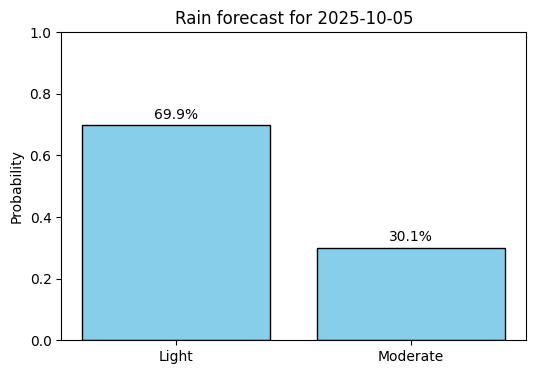

⚠️ High risk of rain at 2025-10-06 20:00 in location (30.0, 31.0). Consider a backup plan. ⚠️ 95.4% chance of Light


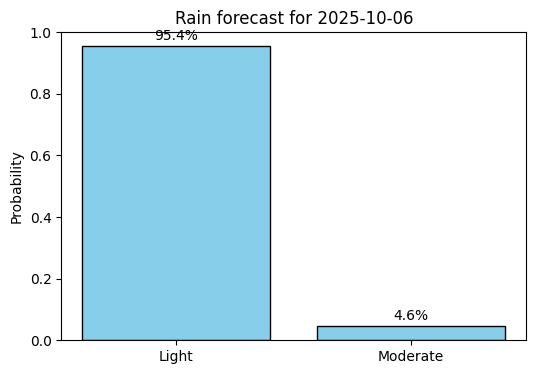

In [12]:
rec1, msg1, prob1 = event_planner("2025-10-05 18:00", 30.0, 31.0, 26, 4)
print(rec1, msg1)
plot_alert_probabilities(prob1, model.classes_, title="Rain forecast for 2025-10-05")

rec2, msg2, prob2 = event_planner("2025-10-06 20:00", 30.0, 31.0, 32, 9)
print(rec2, msg2)
plot_alert_probabilities(prob2, model.classes_, title="Rain forecast for 2025-10-06")
